## Введение в ТВиМС

*Алла Тамбовцева*

### Иллюстрация действия центральной предельной теоремы

Импортируем необходимые библиотеки и модули:

* библиотеку `numpy` с сокращённым названием `np` для работы с числовыми массивами;
* модуль `stats` из библиотеки `scipy` для статистических вычислений;
* модуль `pyplot` с сокращённым названием `plt` из библиотеки `matplotlib` для отрисовки графиков.

In [ ]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Сгенерируем случайную величину `X`, имеющую нормальное распределение со средним 100 и стандартным отклонением 20:

In [2]:
# loc – среднее
# scale – стандартное отклонение

X = stats.norm(loc = 100, scale = 20)

Сымитируем извлечение 1000 разных случайных выборок объёма $N = 9$ из случайной величины `X` и посчитаем среднее по каждой выборке. Для этого напишем цикл и посчитанные средние сохраним в списке `means9`:

In [3]:
means9 = []

# X.rvs() от random variable sample
# 1000 раз повторяем извлечение выборки из X
# считаем среднее и прицепляем к means9

for i in range(1, 1001):
    sample = X.rvs(size = 9)
    mean = sample.mean()
    means9.append(mean)

print(len(means9)) # всего 1000 средних значений
print(means9[0:5]) # 5 средних для примера

1000
[95.84433447878966, 94.9763052763172, 106.46949005036826, 92.94101045512258, 101.5415440481635]


Так как выборки извлекаются случайным образом, у каждого в `means9` будут сохранены разные значения, плюс, при новом запуске ячейки с кодом, элементы `means9` будут обновляться. Это нормальное, главное, что в `means9` всегда 1000 элементов, это 1000 средних значений. Мы как будто бы отправили 1000 разных исследователей с поручением опросить 9 случайно выбранных человек, они их опросили и зафиксировали средние значения интересующего показателя на основе выборки из этих 9 человек.

Построим гистограмму для набора средних `means9`:

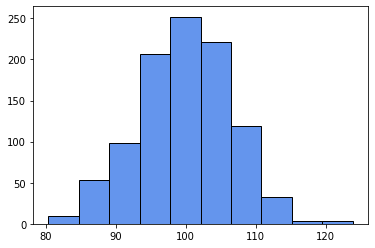

In [4]:
# функция hist() от histogram из модуля plt
# color – цвет заливки, edgecolor – цвет границ столбцов

plt.hist(means9, color = "cornflowerblue", edgecolor = "black");

Что мы видим? Средние значения выборок получились довольно разнообразными. Получается, у кого-то из наших мифических исследователей была выборка со средним значением 115, у кого-то – со значением 80, а у кого-то – со значением 105. Другими словами, кто-то получил оценку среднего, близкую к истинному значению 100 (таких, к счастью, больше всего), а кто-то – достаточно отдалённую от истины.

Согласно центральной предельной теореме, выборочные средние должны быть распределены нормально со средним $a=100$ и стандартным отклонением $\sigma = \frac{20}{\sqrt{9}}$. Итого получаем:

$$
\bar{x} \sim N(a = 100, \sigma = 6.67)
$$

А значит, по правилу трёх сигм, 99.8% должны лежать в следующем интервале (округлим границы):

$$
[a - 3 \sigma; a + 3 \sigma]
$$
$$
[100 - 3 \times 6.67; 100 + 3 \times 6.67]
$$
$$
[80; 120]
$$

Так и есть! Судя по гистограмме, значения разбросаны примерно от 80 до 120, но при этом чаще всего встречаются значения в окрестности 100. Почему интервал получился таким широким? Потому что мы пытались оценить среднее по выборкам очень маленького объёма ($N=9$), а раз так, оценки могут будут неточными, то есть удалёнными от истинного значения параметра.

Посмотрим, что будет происходить, если мы увеличим объём выборки. Будем по аналогичной схеме извлекать из `X` случайные выборки размера $N=36$ и сохранять их в список `means36`:

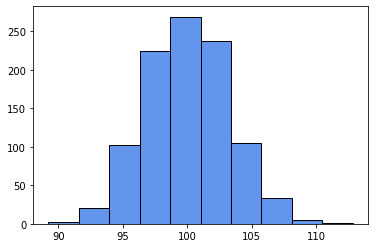

In [5]:
means36 = []

for i in range(1, 1001):
    sample = X.rvs(size = 36)
    mean = sample.mean()
    means36.append(mean)
    
plt.hist(means36, color = "cornflowerblue", edgecolor = "black");

Снова распределение похоже на колокол, но теперь этот колокол более узкий. Согласно центральной предельной теореме, теперь выборочные средние должны быть распределены так:

$$
\bar{x} \sim N(a = 100, \sigma = \frac{20}{\sqrt{36}})
$$

$$
\bar{x} \sim N(a = 100, \sigma = 3.33)
$$

И тогда почти 100%  должны принадлежать интервалу:

$$
[100 - 3 \times 3.33; 100 + 3 \times 3.33]
$$
$$
[90; 110]
$$

Снова наш результат компьютерной симуляции это подтверждает, значения, если верить гистограмме, действительно лежат в этом диапазоне. И да, этот диапазон сейчас уже более узкий, мы будем получать выборочные средние, которые, в целом, отклоняются от истинного среднего `X` не более, чем на 10. 

Увеличим объём выборки до $N=100$:



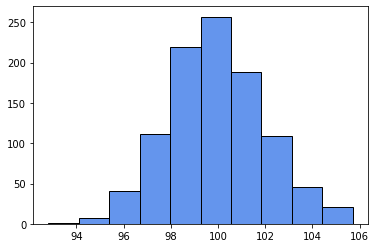

In [7]:
means100 = []

for i in range(1, 1001):
    sample = X.rvs(size = 100)
    mean = sample.mean()
    means100.append(mean)
    
plt.hist(means100, color = "cornflowerblue", edgecolor = "black");

Видно, что гистограмма стала более узкой, значения теперь варьируются примерно от 94 до 106. Какой интервал ожидается, согласно предельной теореме и правилу трёх сигм?

$$
\bar{x} \sim N(a = 100, \sigma = \frac{20}{\sqrt{100}})
$$

$$
\bar{x} \sim N(a = 100, \sigma = 2)
$$

$$
[100 - 3 \times 2; 100 + 3 \times 2]
$$

$$
[94; 106]
$$

Так есть, идеально! Чем больше выборка, чем более точные, то есть сконцентрированные вокруг истинного значения, оценки среднего мы можем получить. 

### Часть 2: выборки из распределения, отличного от нормального

Случайная величина `X`, которую мы создали ранее, имела нормальное распределение. И выборочные средние, которые мы получали по извлечении выборок разного размера, тоже были распределены примерно нормально, гистограммы были похожи на «колокольчики». Однако, если верить центральной предельной теореме, выборочные средние будут распределены нормально, даже если случайная величина, описывающая генеральную совокупность, откуда мы дёргаем выборки, будет иметь распределение, отличное от нормального (конечно, при условии, что выборки большие и мы извлекаем их независимым образом).

Проверим это. Создадим случайную величину `Y`, имеющую равномерное распределение на отрезке от 20 до 60 и зафиксируем её математическое ожидание и стандартное отклонение:

In [8]:
# unif() от uniform distribution
# на первом месте – левая граница отрезка, на втором – длина отрезка
# mean() и std() при применении к случайной величине, а не выборке, 
# считают математическое ожидание и ст отклонение величины

Y = stats.uniform(20, 40)

print("Среднее генеральной совокупности:", Y.mean())
print("Стандартное отклонение генеральной совокупности:", Y.std())

Среднее генеральной совокупности: 40.0
Стандартное отклонение генеральной совокупности: 11.547005383792515


Как мы помним, плотность распределения такой случайной величины постоянна на разных отрезках:

* $\text{f}(y) = 0$, при $Y < 20$ и при $Y > 60$ 
* $\text{f}(y) = \frac{1}{40}$, при $20 \leqslant Y \leqslant 60$.

Чтобы не писать сейчас новый код для построения чисто математического графика плотности, давайте просто извлечём из этой величины очень большую выборку и построим для неё гистограмму. Очертания гистограммы будут напоминать плотность:

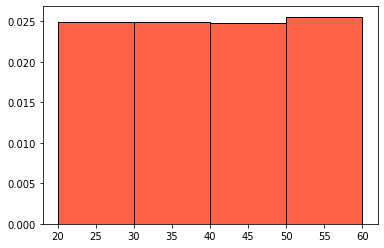

In [9]:
# выборка в 10000 наблюдений из Y
# по вертикальной оси значения плотности, не просто частоты (density=True)
# четыре столбца для меньшей детализации (bins = 4)

r = Y.rvs(size = 10000)
plt.hist(r, color = "tomato", edgecolor = "black", density=True, bins = 4);

Явно видно, что распредение `Y` не является нормальным. Чтобы будет, если мы извлечём из `Y` 1000 выборок размера $N=100$ и посчитаем по ним средние?

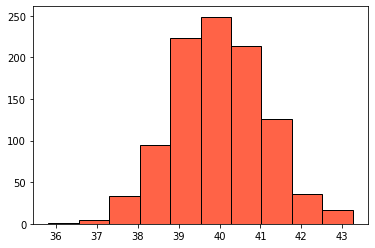

In [10]:
unif_means100 = []

for i in range(1, 1001):
    sample = Y.rvs(size = 100)
    mean = sample.mean()
    unif_means100.append(mean)
    
plt.hist(unif_means100, color = "tomato", edgecolor = "black");

А вот средние уже имеют нормальное распределение! Почему диапазон значений на гистограмме примерно от 36 до 44? Снова применим центральную предельную теорему и правило трёх сигм! 

В самом начале этого примера мы вычислили математическое ожидание `Y` и его стандартное отклонение, $a = 40$, $\sigma = 11.55$. Значит, по теореме:


$$
\bar{x} \sim N(a = 40, \sigma = \frac{11.55}{\sqrt{100}})
$$
$$
\bar{x} \sim N(a = 40, \sigma = 1.155)
$$

И тогда, если мы отклонимся от среднего 40 на три стандартных отклонения, на три сигмы, мы получим:

$$
[40 - 3 \times 1.155; 40 + 3 \times 1.155]
$$

$$
[36.535; 43.465]
$$

Всё сходится! Теорема, как всегда, работает :)